In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris(as_frame = True)

In [3]:
df = iris.data

In [4]:
df['species'] = iris.target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df = df[df['species']!=0][['sepal width (cm)','petal length (cm)','species']]

In [7]:
df.sample(7) 

,sepal width (cm),petal length (cm),species
60,2.0,3.5,1
149,3.0,5.1,2
112,3.0,5.5,2
102,3.0,5.9,2
56,3.3,4.7,1
108,2.5,5.8,2
95,3.0,4.2,1


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

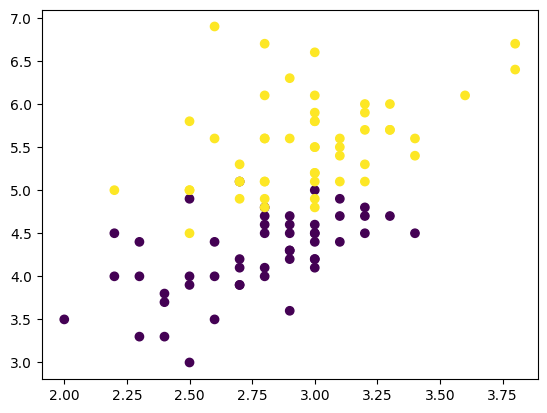

In [9]:
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c = df['species'])

In [10]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5) #means taking 10 for train, 5 for val and test

In [11]:
df_train , df_val , df_test

(     sepal width (cm)  petal length (cm)  species
 138               3.0                4.8        2
 101               2.7                5.1        2
 58                2.9                4.6        1
 66                3.0                4.5        1
 111               2.7                5.3        2
 80                2.4                3.8        1
 97                2.9                4.3        1
 78                2.9                4.5        1
 67                2.7                4.1        1
 149               3.0                5.1        2,
      sepal width (cm)  petal length (cm)  species
 107               2.9                6.3        2
 121               2.8                4.9        2
 115               3.2                5.3        2
 52                3.1                4.9        1
 112               3.0                5.5        2,
      sepal width (cm)  petal length (cm)  species
 124               3.3                5.7        2
 131               3.8       

In [12]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values
y_test

array([2, 2, 2, 1, 2])

In [13]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf)
    y_pred = clf.predict(X_test)
    print('Accuracy Score:',accuracy_score(y_test,y_pred))

# Bagging 

model 1

In [14]:
#Sampling with 'replacement' means the rows selected can be repeated
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),species
67,2.7,4.1,1
111,2.7,5.3,2
58,2.9,4.6,1
149,3.0,5.1,2
67,2.7,4.1,1
101,2.7,5.1,2
138,3.0,4.8,2
97,2.9,4.3,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [16]:
#model 1
dt_bag1 = DecisionTreeClassifier()

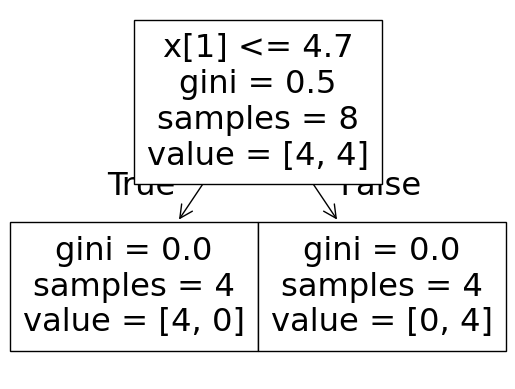

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score: 0.8


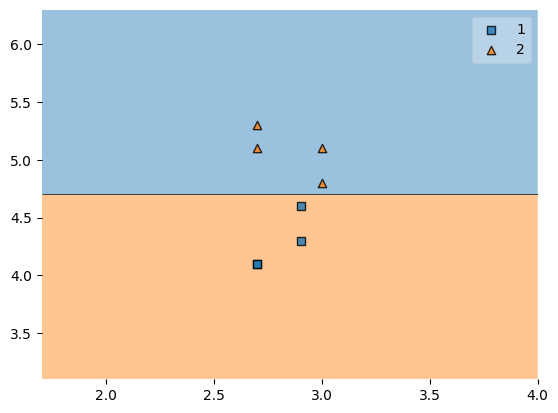

In [17]:
evaluate(dt_bag1 , X, y)

model 2

In [18]:
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),species
111,2.7,5.3,2
138,3.0,4.8,2
149,3.0,5.1,2
111,2.7,5.3,2
111,2.7,5.3,2
66,3.0,4.5,1
78,2.9,4.5,1
58,2.9,4.6,1


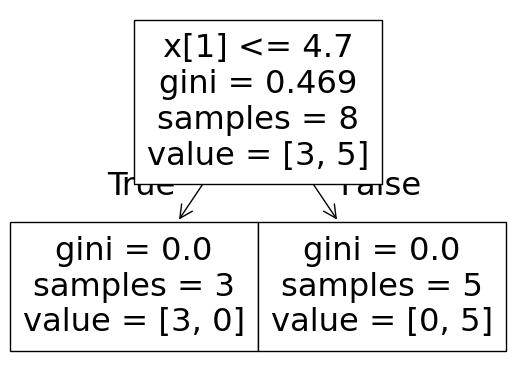

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score: 0.8


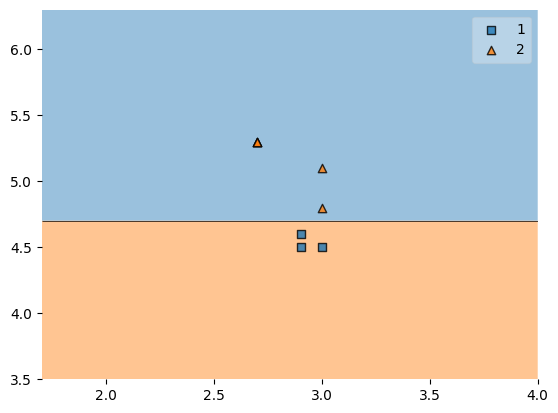

In [19]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

model 3

In [20]:
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),species
149,3.0,5.1,2
101,2.7,5.1,2
66,3.0,4.5,1
78,2.9,4.5,1
138,3.0,4.8,2
97,2.9,4.3,1
67,2.7,4.1,1
111,2.7,5.3,2


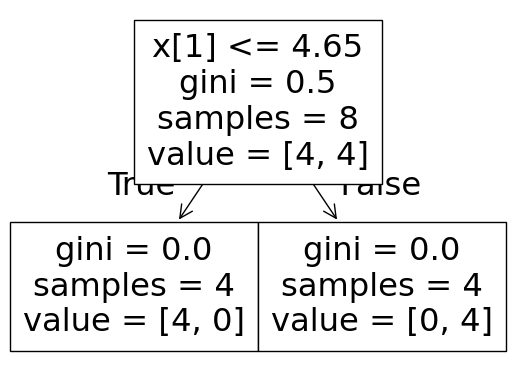

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score: 0.8


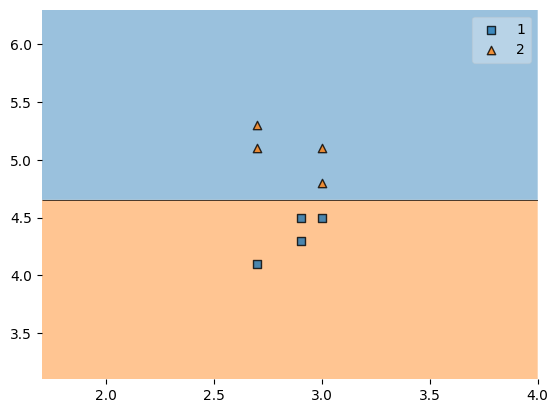

In [21]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

**Predict**

In [22]:
df_test

,sepal width (cm),petal length (cm),species
124,3.3,5.7,2
131,3.8,6.4,2
61,3.0,4.2,1
83,2.7,5.1,1
74,2.9,4.3,1


In [23]:
#checking for one row from df_test
print("Predictor 1",dt_bag1.predict(np.array([2.6,4.4]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.6,4.4]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.6,4.4]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**pasting**

it is just sampling of rows ,  but without replacement , no dups 

In [24]:
df_train

,sepal width (cm),petal length (cm),species
138,3.0,4.8,2
101,2.7,5.1,2
58,2.9,4.6,1
66,3.0,4.5,1
111,2.7,5.3,2
80,2.4,3.8,1
97,2.9,4.3,1
78,2.9,4.5,1
67,2.7,4.1,1
149,3.0,5.1,2


In [25]:
df_train.sample(8) #in pasting this data is used 

,sepal width (cm),petal length (cm),species
149,3.0,5.1,2
80,2.4,3.8,1
67,2.7,4.1,1
58,2.9,4.6,1
78,2.9,4.5,1
111,2.7,5.3,2
66,3.0,4.5,1
138,3.0,4.8,2


**Random Subspaces**

this is a column sampling , all rows are used , and some col are sampled

In [26]:
iris = load_iris(as_frame = True)
df = iris.data
df['species'] = iris.target

In [27]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
100,6.3,3.3,6.0,2.5,2
2,4.7,3.2,1.3,0.2,0
5,5.4,3.9,1.7,0.4,0
98,5.1,2.5,3.0,1.1,1
112,6.8,3.0,5.5,2.1,2


In [28]:
df1 = df.sample(15)
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
24,4.8,3.4,1.9,0.2,0
122,7.7,2.8,6.7,2.0,2
1,4.9,3.0,1.4,0.2,0
35,5.0,3.2,1.2,0.2,0
82,5.8,2.7,3.9,1.2,1


In [29]:
df1.sample(2,replace = True , axis=1)# (num_of_col_needed , replace = dups or not ,axis = 1 means col sampling  )

,sepal length (cm),species
24,4.8,0
122,7.7,2
1,4.9,0
35,5.0,0
82,5.8,1
116,6.5,2
27,5.2,0
79,5.7,1
3,4.6,0
119,6.0,2


**Random Patches**

both row and col sampling 

In [30]:
df1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
24,4.8,3.4,1.9,0.2,0
122,7.7,2.8,6.7,2.0,2
1,4.9,3.0,1.4,0.2,0
35,5.0,3.2,1.2,0.2,0
82,5.8,2.7,3.9,1.2,1
116,6.5,3.0,5.5,1.8,2
27,5.2,3.5,1.5,0.2,0
79,5.7,2.6,3.5,1.0,1
3,4.6,3.1,1.5,0.2,0
119,6.0,2.2,5.0,1.5,2


In [31]:
df1.sample(8,replace=True).sample(2,replace=True ,axis=1) #sample(row).sample(col_from those selected rows)

,sepal width (cm),sepal length (cm)
82,2.7,5.8
35,3.2,5.0
1,3.0,4.9
27,3.5,5.2
116,3.0,6.5
118,2.6,7.7
118,2.6,7.7
119,2.2,6.0
